In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('../Datasets/data.csv')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45987 non-null  object 
 3   category_list         45475 non-null  object 
 4    market               45468 non-null  object 
 5    funding_total_usd    49434 non-null  object 
 6   status                48120 non-null  object 
 7   country_code          44162 non-null  object 
 8   state_code            30159 non-null  object 
 9   region                44162 non-null  object 
 10  city                  43319 non-null  object 
 11  funding_rounds        49434 non-null  float64
 12  founded_at            38551 non-null  object 
 13  founded_month         38479 non-null  object 
 14  founded_quarter       38479 non-null  object 
 15  founded_year       

In [4]:
df_copy = df.copy()

In [5]:
df.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

### Missing data

In [6]:
column = list(df.columns)
stat = {}
for col in column:
    stat[col] =  [df[col].nunique(), df[col].isna().sum(), df[col].dtype]
term =  pd.DataFrame.from_dict(stat, orient='index', columns=['Unique',  'Missed values in %', 'DType'])
term = term.sort_values(by='Missed values in %',ascending= False)

In [7]:
df.isnull().sum().sum()

92517

In [8]:
df = df.drop_duplicates()
df.shape

(49438, 39)

In [9]:
for col in df.columns:
    if term.loc[col]['Missed values in %'] <= 4:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

column = list(df.columns)
stat = {}
for col in column:
    stat[col] =  [df[col].nunique(), df[col].isna().sum(), df[col].dtype]
term1 =  pd.DataFrame.from_dict(stat, orient='index', columns=['Unique',  'Missed values in %', 'DType'])
term1 = term1.sort_values(by='Missed values in %',ascending= False)
term1

,Unique,Missed values in %,DType
state_code,61,19279,object
founded_year,103,10959,float64
founded_quarter,218,10959,object
founded_month,420,10959,object
founded_at,3369,10887,object
city,4187,6119,object
country_code,115,5276,object
region,1089,5276,object
market,753,3970,object
category_list,16674,3963,object


In [10]:
df = df.drop(['permalink','homepage_url' ,'state_code','region','city','category_list', 'name'], axis=1)

In [11]:
df = df.dropna()
df.shape

(33151, 32)

In [12]:
df.isnull().sum().sum()

0

In [13]:
column = list(df.columns)
stat = {}
for col in column:
    stat[col] =  [df[col].nunique(), df[col].isna().sum(), df[col].dtype]
term1 =  pd.DataFrame.from_dict(stat, orient='index', columns=['Unique',  'Missed values in %', 'DType'])
term1 = term1.sort_values(by='Missed values in %',ascending= False)
term1

,Unique,Missed values in %,DType
market,720,0,object
funding_total_usd,10831,0,object
round_G,30,0,float64
round_F,101,0,float64
round_E,206,0,float64
round_D,398,0,float64
round_C,618,0,float64
round_B,1031,0,float64
round_A,1505,0,float64
product_crowdfunding,126,0,float64


### Data Transformation

covert các cột datetime

In [14]:
df[['founded_at','first_funding_at','last_funding_at']].head()

,founded_at,first_funding_at,last_funding_at
0,01/06/2012,30/06/2012,30/06/2012
2,26/10/2012,09/08/2012,09/08/2012
3,01/04/2011,01/04/2011,01/04/2011
4,01/01/2014,17/08/2014,26/09/2014
8,01/01/2010,24/07/2014,24/07/2014


In [15]:
format_date = ('founded_at','first_funding_at','last_funding_at')
for i in format_date:
  df[i] = pd.to_datetime(df[i], errors = 'coerce')

In [16]:
#Để giảm độ phức tạp, trong khi xử lý các trường biến ngày, chuyển đổi ngày thực tế thành ngày tương đối, mô tả khoảng cách từ khi thành lập đến lần cấp vốn đầu tiên và cuối cùng, sau đó bỏ ngày thành lập.

df['age_first_funding'] = (df['first_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['age_last_funding'] = (df['last_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['founded_month'] = pd.DatetimeIndex(df['founded_at']).month
df['founded_quarter'] = pd.DatetimeIndex(df['founded_at']).quarter

In [17]:
df = df.drop(['first_funding_at','last_funding_at','founded_at'],axis=1)

In [18]:
df.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,News,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192
2,Publishing,"40,000",operating,EST,1.0,10,4,2012.0,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507
3,Electronics,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Tourism,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,Software,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


Xem giá trị khác nhau của từng cột

In [19]:
num_unique_country_code = df['country_code'].nunique()
num_unique_market = df['market'].nunique()
num_unique_status = df['status'].nunique()

print("Số lượng giá trị khác nhau trong cột 'market':", num_unique_market)
print("Số lượng giá trị khác nhau trong cột 'country_code':", num_unique_country_code)
print("Số lượng giá trị khác nhau trong cột 'status':", num_unique_status)

Số lượng giá trị khác nhau trong cột 'market': 720
Số lượng giá trị khác nhau trong cột 'country_code': 109
Số lượng giá trị khác nhau trong cột 'status': 3


Hiển thị phân phối của các giá trị

In [20]:
market_distribution = df['market'].value_counts().reset_index()
market_distribution.columns = ['market', 'count']
print("\nPhân phối của các giá trị trong cột 'market':\n", market_distribution)


Phân phối của các giá trị trong cột 'market':
                     market  count
0                Software    3525
1           Biotechnology    2361
2                  Mobile    1425
3              E-Commerce    1262
4             Curated Web    1163
..                     ...    ...
715        Weird Hardware       1
716         App Discovery       1
717      Low Bid Auctions       1
718              Realtors       1
719   Clean Technology IT       1

[720 rows x 2 columns]


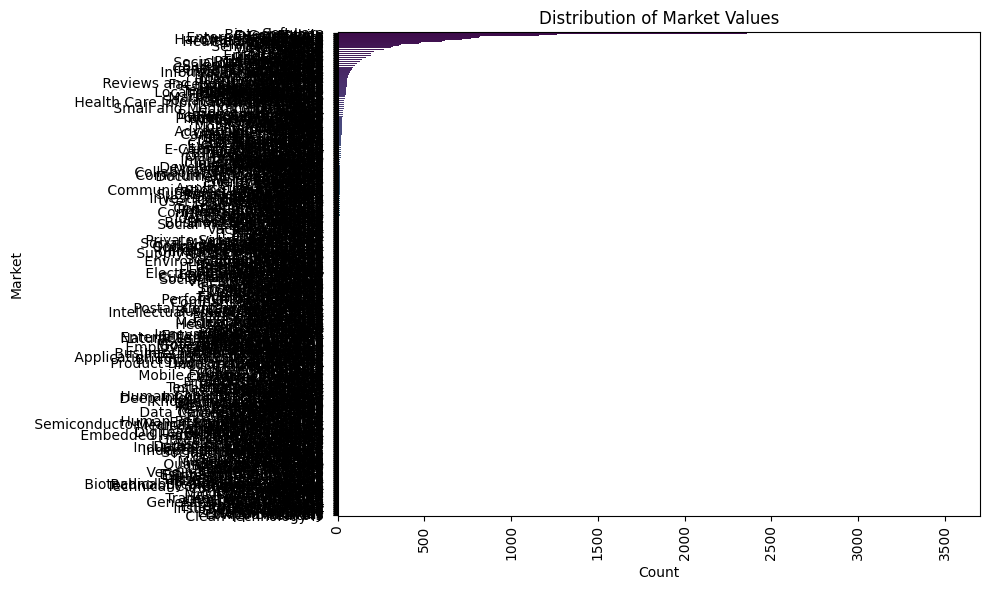

In [21]:
import seaborn as sns

# Tạo biểu đồ cột sử dụng seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='market', data=market_distribution, palette='viridis')
plt.ylabel('Market')
plt.xlabel('Count')
plt.title('Distribution of Market Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Gom nhóm các giá trị ít xuất hiện

In [22]:
# Chọn ngưỡng
threshold = 200

# Lấy các giá trị hiếm xuất hiện
rare_values = df['market'].value_counts()[df['market'].value_counts() < threshold].index

# Gom nhóm các giá trị hiếm xuất hiện lại thành 'Others'
df.loc[df['market'].isin(rare_values), 'market'] = 'Others'


In [23]:
df['market'].unique()

array([' News ', 'Others', ' Software ', ' E-Commerce ',
       ' Health and Wellness ', ' Real Estate ', ' Education ',
       ' Search ', ' Curated Web ', ' Analytics ', ' Fashion ',
       ' Biotechnology ', ' Mobile ', ' SaaS ', ' Manufacturing ',
       ' Advertising ', ' Games ', ' Travel ', ' Finance ',
       ' Social Media ', ' Enterprise Software ', ' Clean Technology ',
       ' Hardware + Software ', ' Semiconductors ', ' Messaging ',
       ' Web Hosting ', ' Security ', ' Health Care ', ' Consulting ',
       ' Medical ', ' Hospitality '], dtype=object)

In [24]:
# Tạo một dict để ánh xạ từ các chủ đề cũ sang các nhóm mới
topic_mapping = {
    ' News ': 'Media',
    'Others': 'Others',
    ' Software ': 'Technology',
    ' E-Commerce ': 'Commerce',
    ' Health and Wellness ': 'Health',
    ' Real Estate ': 'Real Estate',
    ' Education ': 'Education',
    ' Search ': 'Technology',
    ' Curated Web ': 'Technology',
    ' Analytics ': 'Technology',
    ' Fashion ': 'Fashion',
    ' Biotechnology ': 'Biotechnology',
    ' Mobile ': 'Technology',
    ' SaaS ': 'Technology',
    ' Manufacturing ': 'Manufacturing',
    ' Advertising ': 'Marketing',
    ' Games ': 'Entertainment',
    ' Travel ': 'Travel',
    ' Finance ': 'Finance',
    ' Social Media ': 'Media',
    ' Enterprise Software ': 'Technology',
    ' Clean Technology ': 'Technology',
    ' Hardware + Software ': 'Technology',
    ' Semiconductors ': 'Technology',
    ' Messaging ': 'Technology',
    ' Web Hosting ': 'Technology',
    ' Security ': 'Technology',
    ' Health Care ': 'Health',
    ' Consulting ': 'Services',
    ' Medical ': 'Health',
    ' Hospitality ': 'Services'
}

# Áp dụng ánh xạ để gom nhóm lại các chủ đề
df['market_grouped'] = df['market'].map(topic_mapping).fillna('Others')

# Kiểm tra phân phối mới của các nhóm
market_group_distribution = df['market_grouped'].value_counts().reset_index()
market_group_distribution.columns = ['market_group', 'count']
print("\nPhân phối của các nhóm sau khi gom nhóm lại:\n", market_group_distribution)



Phân phối của các nhóm sau khi gom nhóm lại:
      market_group  count
0          Others  11340
1      Technology  10763
2   Biotechnology   2361
3          Health   1651
4        Commerce   1262
5           Media    889
6   Entertainment    814
7       Marketing    803
8        Services    708
9         Finance    603
10      Education    600
11  Manufacturing    472
12    Real Estate    319
13        Fashion    296
14         Travel    270


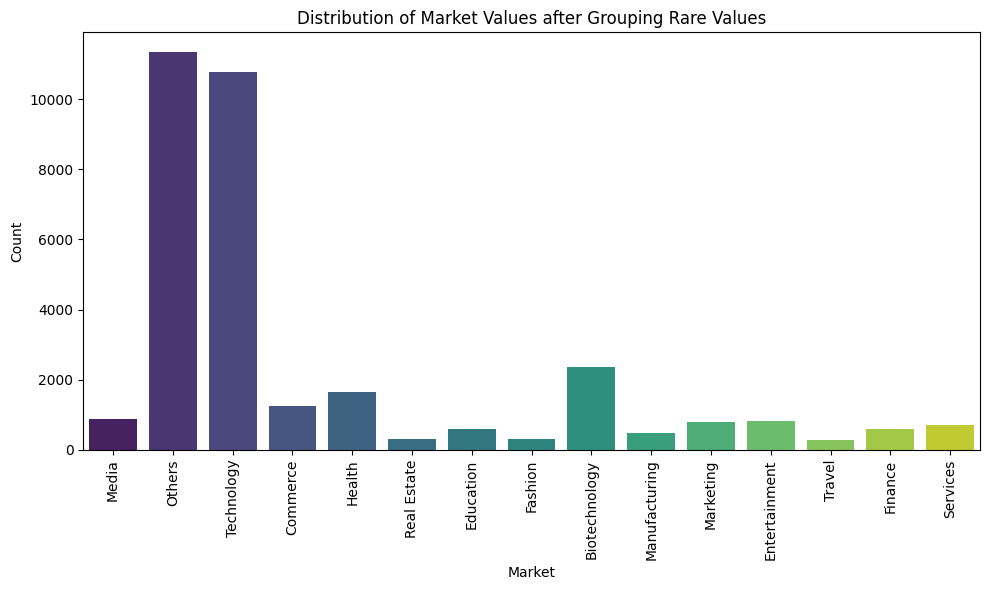

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_grouped', data=df, palette='viridis')
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Distribution of Market Values after Grouping Rare Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:

df.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market_grouped
0,News,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media
2,Others,"40,000",operating,EST,1.0,10,4,2012.0,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others
3,Others,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others
4,Others,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others
8,Software,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology


Xét cột country_code

In [27]:
country_code_distribution = df['country_code'].value_counts().reset_index()
country_code_distribution.columns = ['country_code', 'count']
print(country_code_distribution['country_code'].unique())
print("\nPhân phối của các giá trị trong cột 'country_code':\n", country_code_distribution)

['USA' 'GBR' 'CAN' 'DEU' 'IND' 'CHN' 'FRA' 'ISR' 'ESP' 'IRL' 'SGP' 'AUS'
 'SWE' 'NLD' 'ITA' 'BRA' 'KOR' 'JPN' 'RUS' 'CHE' 'CHL' 'FIN' 'DNK' 'ARG'
 'BEL' 'TUR' 'HKG' 'AUT' 'NOR' 'POL' 'MEX' 'BGR' 'ARE' 'PRT' 'NZL' 'ZAF'
 'MYS' 'IDN' 'CZE' 'EST' 'UKR' 'HUN' 'THA' 'TWN' 'PHL' 'GRC' 'COL' 'NGA'
 'LTU' 'ROM' 'EGY' 'ISL' 'PER' 'JOR' 'KEN' 'LUX' 'PAK' 'VNM' 'SVK' 'SVN'
 'CYP' 'SRB' 'LVA' 'LBN' 'GHA' 'UGA' 'URY' 'CYM' 'BGD' 'DZA' 'HRV' 'CRI'
 'PAN' 'SAU' 'GTM' 'SLV' 'BWA' 'BMU' 'BHR' 'TZA' 'TUN' 'DOM' 'BLR' 'AZE'
 'KHM' 'MKD' 'MAR' 'GIB' 'MDA' 'MMR' 'NPL' 'ARM' 'BHS' 'CMR' 'MLT' 'ALB'
 'MCO' 'UZB' 'OMN' 'BRN' 'TTO' 'JAM' 'ECU' 'MUS' 'SOM' 'NIC' 'SYC' 'MAF'
 'LAO']

Phân phối của các giá trị trong cột 'country_code':
     country_code  count
0            USA  22219
1            GBR   1901
2            CAN   1040
3            DEU    702
4            IND    646
..           ...    ...
104          SOM      1
105          NIC      1
106          SYC      1
107          MAF      1
108          LAO 

Chọn ngưỡng

In [28]:
# Chọn ngưỡng
threshold = 300
# Lấy các giá trị hiếm xuất hiện
rare_values = df['country_code'].value_counts()[df['country_code'].value_counts() < threshold].index
# Gom nhóm các giá trị hiếm xuất hiện lại thành 'Others'
df.loc[df['country_code'].isin(rare_values), 'country_code'] = 'Others'

  country_code    country_name
0          USA   United States
1       Others          Others
2          GBR  United Kingdom
3          FRA          France
4          CHN           China
5          CAN          Canada
6          IND           India
7          DEU         Germany
8          ISR          Israel
9          ESP           Spain


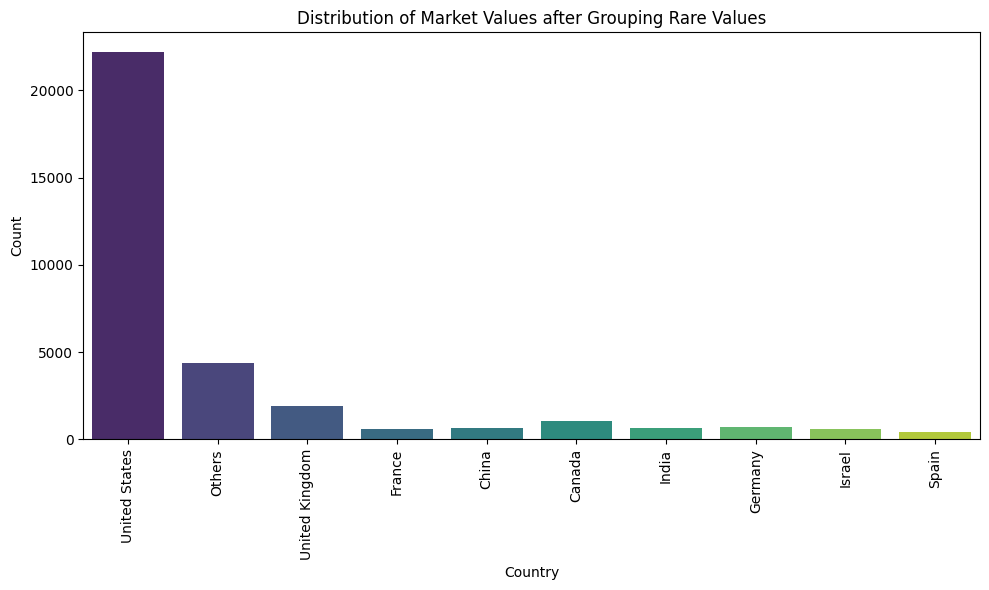

In [29]:
import pycountry
# Danh sách mã ký hiệu quốc gia
country_codes = df['country_code'].unique()
# Tạo DataFrame chứa mã ký hiệu quốc gia và tên đầy đủ của quốc gia
country_info = pd.DataFrame(columns=['country_code', 'country_name'])

for code in country_codes:
    country = pycountry.countries.get(alpha_3=code)
    country_name = country.name if country else 'Others'
    country_info = country_info.append({'country_code': code, 'country_name': country_name}, ignore_index=True)

print(country_info)
df_merged = pd.merge(df, country_info, on='country_code', how='left')
# Vẽ biểu đồ countplot với thông tin về tên quốc gia
plt.figure(figsize=(10, 6))
sns.countplot(x='country_name', data=df_merged, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Market Values after Grouping Rare Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
df.head()

,market,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market_grouped
0,News,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media
2,Others,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others
3,Others,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others
4,Others,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others
8,Software,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology


In [31]:
df = df.drop(['market'], axis=1)

In [32]:
df.rename(columns={'market_grouped':'market'}, inplace = True)
df.head()

,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market
0,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media
2,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others
3,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others
4,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others
8,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology


### Categorical Data Encoding


#### Label Encoding

In [33]:
df.head(5)

,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market
0,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media
2,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others
3,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others
4,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others
8,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology


Lựa chọn các cột 'status' và 'country_code' từ DataFrame để mã hóa

In [34]:
df1 = df[["status","country_code", 'market']]
df1.head(10)


,status,country_code,market
0,acquired,USA,Media
2,operating,Others,Others
3,operating,GBR,Others
4,operating,USA,Others
8,operating,USA,Technology
10,operating,Others,Commerce
12,operating,USA,Health
13,operating,USA,Health
14,operating,USA,Real Estate
15,operating,GBR,Education


#### Vẽ biểu đồ trước khi mã hóa của cột "status"

Text(0.5, 1.0, 'Original Status Distribution')

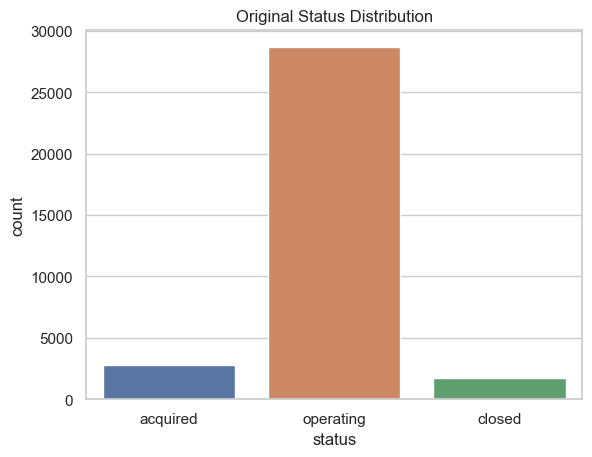

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the original 'status' column
sns.countplot(x='status', data=df)
plt.title('Original Status Distribution')


#### Status

In ra các giá trị duy nhất trong cột 'status' để kiểm tra

In [36]:
print(df['status'].unique())


['acquired' 'operating' 'closed']


Áp dụng Label Encoding cho cột 'status' 


In [37]:
from sklearn.preprocessing import LabelEncoder

data_temp = df.copy()
data_temp['status'] = data_temp['status'].replace(['acquired', 'closed'], 'non-operating')

le_temp = LabelEncoder()
le_temp.fit(data_temp['status'])

df['le_status'] = le_temp.transform(data_temp['status'])

df.head()


,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market,le_status
0,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media,0
2,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others,1
3,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others,1
4,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others,1
8,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology,1


#### Vẽ biểu đồ sau khi mã hóa của cột "status"

Text(0.5, 1.0, 'Encoded Status Distribution')

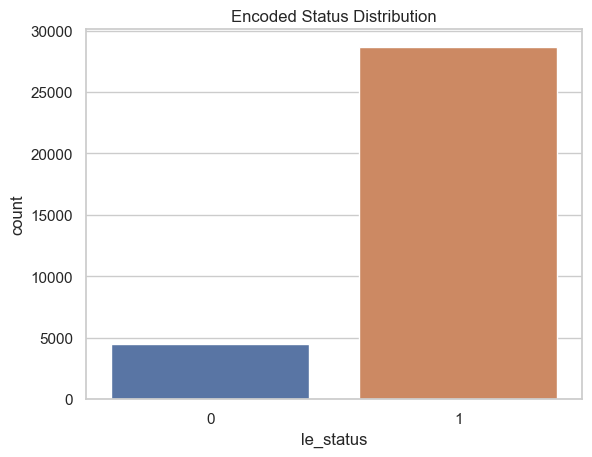

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the original 'status' column
sns.countplot(x='le_status', data=df)
plt.title('Encoded Status Distribution')


#### Vẽ biểu đồ trước khi mã hóa của cột "country_code"

#### Country_code

Huấn luyện (fit) LabelEncoder với dữ liệu từ cột 'country_code'


Text(0.5, 1.0, 'Original Country_code Distribution')

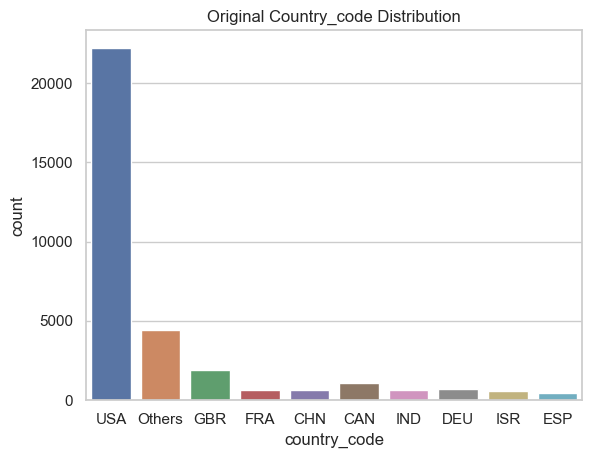

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the original 'status' column
sns.countplot(x='country_code', data=df)
plt.title('Original Country_code Distribution')


In [40]:
le = LabelEncoder()
le.fit(df['country_code'])


LabelEncoder()

Áp dụng Label Encoding lên cột 'country_code' và tạo một cột mới lưu kết quả

In [41]:
df['le_country_code'] = le.transform(df['country_code'])
df.head()

,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market,le_status,le_country_code
0,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.482192,0.482192,Media,0,9
2,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others,1,8
3,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Others,1,5
4,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247,Others,1,9
8,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology,1,9


#### Vẽ biểu đồ sau khi mã hóa của cột "country_code"

Text(0.5, 1.0, 'Encoded Country_code Distribution')

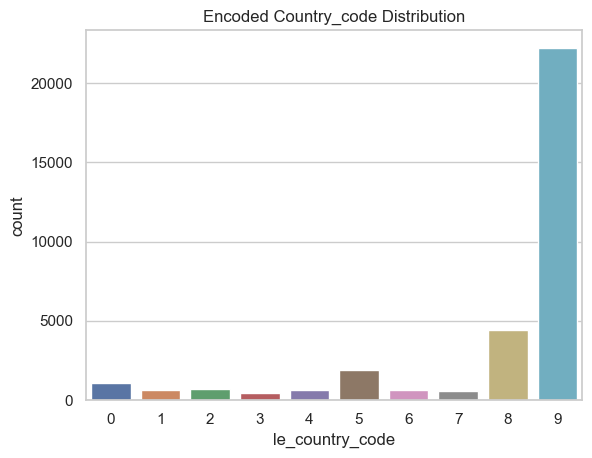

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the original 'status' column
sns.countplot(x='le_country_code', data=df)
plt.title('Encoded Country_code Distribution')


Text(0.5, 1.0, 'Encoded Market Distribution')

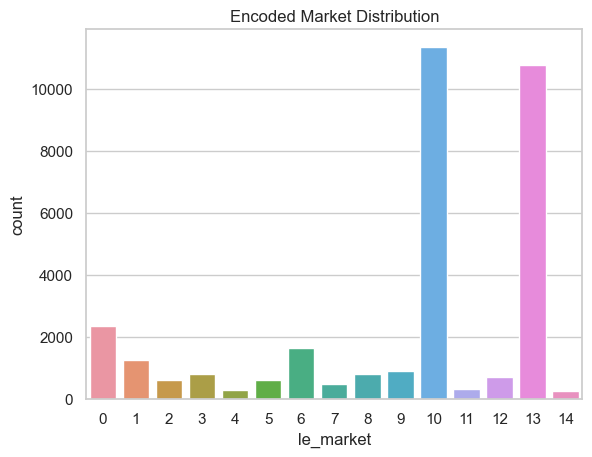

In [43]:
le = LabelEncoder()
le.fit(df['market'])
df['le_market'] = le.transform(df['market'])
sns.countplot(x='le_market', data=df)
plt.title('Encoded Market Distribution')

In ra các lớp đã được LabelEncoder để kiểm tra

In [44]:
df.head()

,funding_total_usd,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,market,le_status,le_country_code,le_market
0,"17,50,000",acquired,USA,1.0,1,1,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,Media,0,9,9
2,"40,000",operating,Others,1.0,10,4,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.131507,-0.131507,Others,1,8,10
3,"15,00,000",operating,GBR,1.0,1,1,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,Others,1,5,10
4,"60,000",operating,USA,2.0,1,1,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.624658,0.734247,Others,1,9,10
8,-,operating,USA,1.0,1,1,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.561644,4.561644,Technology,1,9,13


In [45]:
df = df.drop(['status', 'country_code','market'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33151 entries, 0 to 49437
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_total_usd     33151 non-null  object 
 1   funding_rounds        33151 non-null  float64
 2   founded_month         33151 non-null  int64  
 3   founded_quarter       33151 non-null  int64  
 4   founded_year          33151 non-null  float64
 5   seed                  33151 non-null  float64
 6   venture               33151 non-null  float64
 7   equity_crowdfunding   33151 non-null  float64
 8   undisclosed           33151 non-null  float64
 9   convertible_note      33151 non-null  float64
 10  debt_financing        33151 non-null  float64
 11  angel                 33151 non-null  float64
 12  grant                 33151 non-null  float64
 13  private_equity        33151 non-null  float64
 14  post_ipo_equity       33151 non-null  float64
 15  post_ipo_debt      

### Handling Imbalanced Datasets

#### Upsampling

In [46]:
df["le_status"].value_counts()

1    28670
0     4481
Name: le_status, dtype: int64

In [47]:
le_status_1 = df[df["le_status"] == 1]
le_status_0 = df[df["le_status"] == 0]

In [48]:
from sklearn.utils import resample
le_status_0_upsampled  = resample(le_status_0,
             replace=True, 
             n_samples=len(le_status_1), 
             random_state=27)


In [49]:
le_status_up = pd.concat([le_status_1, le_status_0_upsampled ])


In [50]:
df = df.merge(le_status_up, how='left', on=df.columns.tolist())

In [51]:
df["le_status"].value_counts()

1    29500
0    29049
Name: le_status, dtype: int64

In [52]:
df['funding_total_usd_clean'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd_clean'] = df['funding_total_usd_clean'].str.replace('-', '0')
df['funding_total_usd_clean'] = pd.to_numeric(df['funding_total_usd_clean'], errors='coerce')


### Xử lý Outlier cho Funding_total_usd

In [53]:
df.head()

,funding_total_usd,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,le_status,le_country_code,le_market,funding_total_usd_clean
0,"17,50,000",1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
1,"17,50,000",1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
2,"17,50,000",1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
3,"17,50,000",1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
4,"40,000",1.0,10,4,2012.0,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.131507,-0.131507,1,8,10,40000


In [54]:
column_to_check = 'funding_total_usd_clean'

In [55]:
Q1 = df['funding_total_usd_clean'].quantile(0.25)
Q3 = df['funding_total_usd_clean'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
data_no_outliers = df[(df['funding_total_usd_clean'] >= lower_bound) &
                        (df['funding_total_usd_clean'] <= upper_bound)]



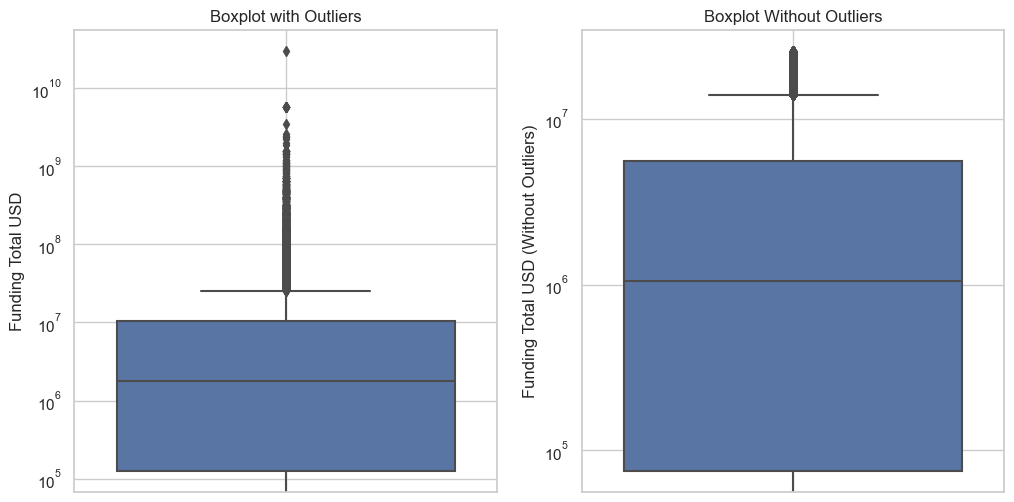

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['funding_total_usd_clean'])
plt.title('Boxplot with Outliers')
plt.ylabel('Funding Total USD')
plt.yscale('log')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers['funding_total_usd_clean'])
plt.title('Boxplot Without Outliers')
plt.ylabel('Funding Total USD (Without Outliers)')
plt.yscale('log')
plt.grid(True)

In [58]:
df = df[(df['funding_total_usd_clean'] >= lower_bound) &
                        (df['funding_total_usd_clean'] <= upper_bound)]
df.shape

(51254, 32)

### Xử lý Outlier Funding_rounds

In [59]:
column_to_check_round = 'funding_rounds'

In [60]:
Q1_round = df['funding_rounds'].quantile(0.25)
Q3_round = df['funding_rounds'].quantile(0.75)
IQR_round = Q3_round - Q1_round
lower_bound_round = Q1_round - 1.5 * IQR_round
upper_bound_round = Q3_round + 1.5 * IQR_round

In [61]:
outliers_round = df[(df[column_to_check_round] < (Q1_round - threshold * IQR_round)) | (df[column_to_check_round] > (Q3_round + threshold * IQR_round))]


In [62]:
data_no_outliers_round = df[(df['funding_rounds'] >= lower_bound_round) &
                        (df['funding_rounds'] <= upper_bound_round)]

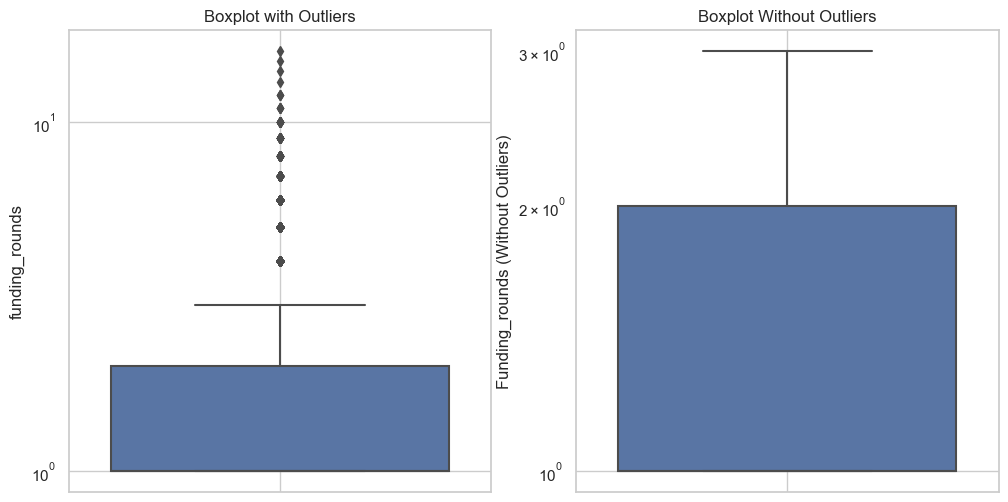

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['funding_rounds'])
plt.title('Boxplot with Outliers')
plt.ylabel('funding_rounds')
plt.yscale('log')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers_round['funding_rounds'])
plt.title('Boxplot Without Outliers')
plt.ylabel('Funding_rounds (Without Outliers)')
plt.yscale('log')
plt.grid(True)

In [64]:
df = df[(df['funding_rounds'] >= lower_bound_round) &
                        (df['funding_rounds'] <= upper_bound_round)]
df.shape

(48303, 32)

### Xử lý Outlier cho Founded_year

In [65]:
column_to_check = 'founded_year'

In [66]:
Q1 = df['founded_year'].quantile(0.25)
Q3 = df['founded_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
outliers = df[(df[column_to_check] < (Q1 - threshold * IQR)) | (df[column_to_check] > (Q3 + threshold * IQR))]

In [68]:
data_no_outliers = df[(df['founded_year'] >= lower_bound) &
                        (df['founded_year'] <= upper_bound)]

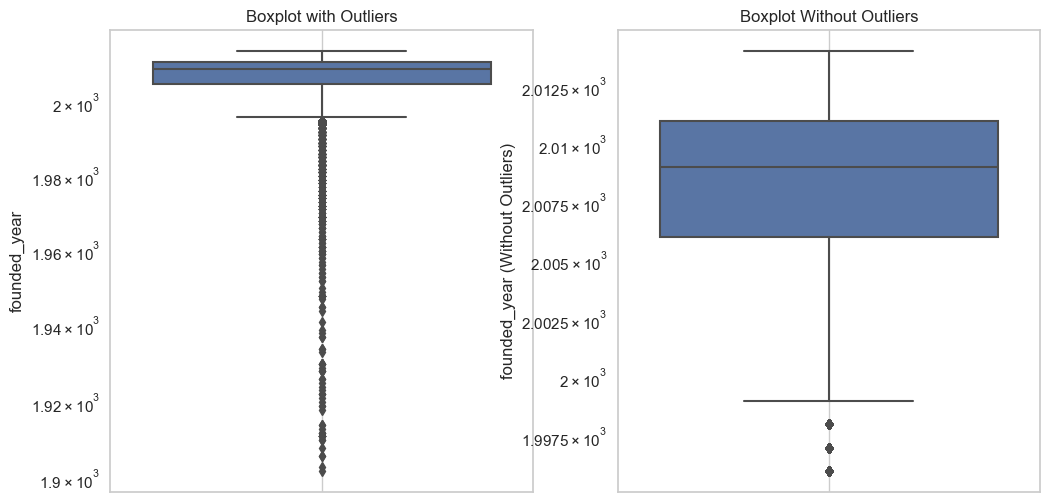

In [69]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['founded_year'])
plt.title('Boxplot with Outliers')
plt.ylabel('founded_year')
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers['founded_year'])
plt.title('Boxplot Without Outliers')
plt.ylabel('founded_year (Without Outliers)')
plt.yscale('log')
plt.grid(True)

In [70]:
df = df[(df['founded_year'] >= lower_bound) &
                        (df['founded_year'] <= upper_bound)]
df.shape

(46420, 32)

### Xử lý Outlier cho Venture

In [71]:
column_to_check_venture = 'venture'

In [72]:
Q1_venture = df['venture'].quantile(0.25)
Q3_venture = df['venture'].quantile(0.75)
IQR_venture = Q3_venture - Q1_venture
lower_bound_venture = Q1_venture - 1.5 * IQR_venture
upper_bound_venture = Q3_venture + 1.5 * IQR_venture

In [73]:
outliers_venture = df[(df[column_to_check_venture] < (Q1_venture - threshold * IQR_venture)) | (df[column_to_check_venture] > (Q3_venture + threshold * IQR_venture))]

In [74]:
data_trimmed_venture = df[(df['venture'] >= lower_bound_venture) & (df['venture'] <= upper_bound_venture)]

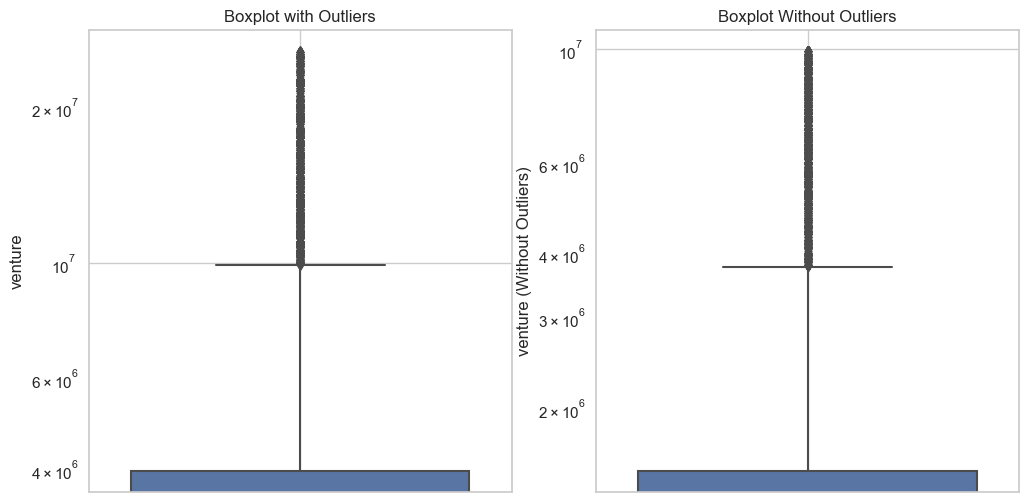

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['venture'])
plt.title('Boxplot with Outliers')
plt.ylabel('venture')
plt.yscale('log')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.boxplot(y=data_trimmed_venture['venture'])
plt.title('Boxplot Without Outliers')
plt.ylabel('venture (Without Outliers)')
plt.yscale('log')
plt.grid(True)

In [76]:
df = df[(df['venture'] >= lower_bound_venture) & (df['venture'] <= upper_bound_venture)]
df.shape

(40760, 32)

In [78]:
df = df.drop(['funding_total_usd'], axis=1)

In [80]:
df.rename(columns={'le_status':'status', 'le_country_code':'country', 'le_market':'market', 'funding_total_usd_clean':'funding_total'}, inplace = True)
df.head(20)

,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding,status,country,market,funding_total
0,1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
1,1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
2,1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
3,1.0,1,1,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.482192,0.482192,0,9,9,1750000
4,1.0,10,4,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.131507,-0.131507,1,8,10,40000
5,1.0,1,1,2011.0,1500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1,5,10,1500000
6,2.0,1,1,2014.0,0.0,0.0,60000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.624658,0.734247,1,9,10,60000
7,1.0,1,1,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.561644,4.561644,1,9,13,0
8,1.0,1,1,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.134247,1.134247,1,8,1,40000
9,1.0,1,1,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.134247,1.134247,1,8,1,40000


In [86]:
df = df.dropna()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chọn và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 score:", f1)


Accuracy: 0.9590184049079754
F1 score: 0.9607981220657278


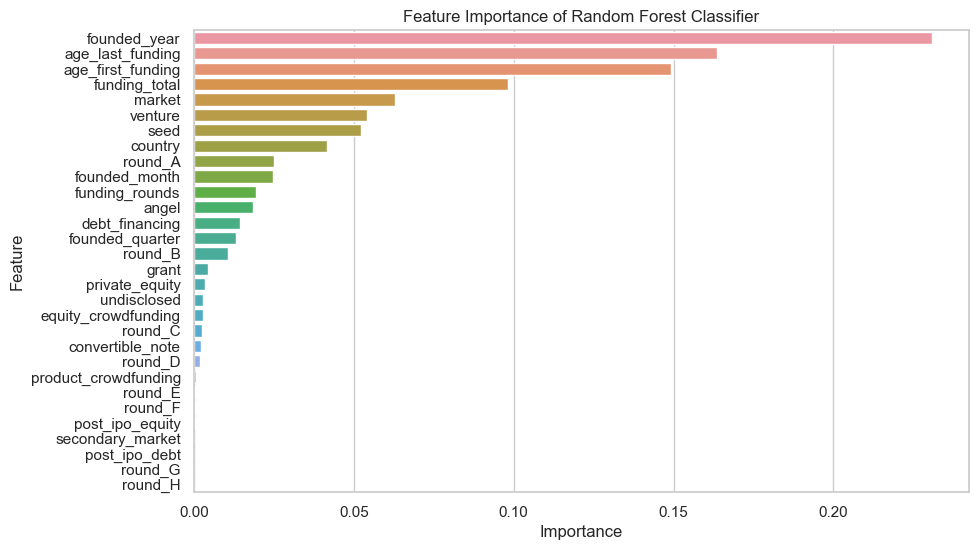

In [88]:
# Lấy độ quan trọng của các đặc trưng từ mô hình
feature_importances = model.feature_importances_

# Tạo DataFrame chứa thông tin về độ quan trọng của các đặc trưng
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sắp xếp DataFrame theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()
